# 컬러 영상 처리
-----
## openCV 컬러 표현 방법
openCV에서 색상을 표현하는 방법은 BGR, HSV, YCrCb등 여러가지가 있다.  

<br>

### BGR
가장 많이 사용하는 표현 방법. **파랑(B), 초록(G), 빨강(R)** 세 가지 색을 섞어서 색을 표현하는 방식이다. 각 색상은 0~255 사이 값으로 표시하고, 숫자가 클수록 더 밝아진다.  

### HSV
BGR과 같이 3개의 채널을 갖는다. 3개의 채널은 **색조(Hue), 채도(Saturation), 명도(Value)** 이다. H는 어떤 색상인지, S는 색상이 얼마나 순수한지, V는 색상의 밝기를 표현한다.

<img src="./img/color_video_processing/hsv.JPG" width="20%" height="20%">

<br>

### YCrCb
**밝기(Luma), 밝기와 파란색과의 색상 차(Chroma Blue), 밝기와 빨간색의 색상 차(Chroma Red)** 총 3채널로 구성된다.
 
-----

## 컬러 표현 간 변환
openCV는 **cvtColor()** 함수를 제공한다.

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
img = cv2.imread('./img/color_video_processing/flowers.jpg', cv2.IMREAD_COLOR) # BGR로 불러오기
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # BGR to HSV
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # BGR to HCrCb
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR to Gray Scale

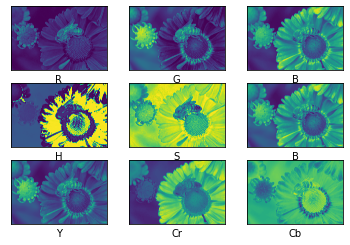

In [4]:
r = cv2.split(img) + cv2.split(hsv) + cv2.split(ycrcb)
label = ["R", "G", "B", "H", "S", "B", "Y", "Cr", "Cb"]
fig = plt.figure()
for i in range(len(r)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(r[i])
    ax.set_xlabel(label[i])
    ax.set_xticks([]), ax.set_yticks([])

## 컬러 히스토그램 평활화
그레이스케일 전체 구간에서 균일한 분포로 나타나도록 바꿔주는 기법이다.  
HSV, YCrCb는 밝기값 채널 V, Y를 히스토그램 평활화를 적용하면 된다.  
영상/사진의 명암비를 향상 시킬 수 있다.

### 구현 방법
히스토그램 평활화는 사진/영상 픽셀값들의 **누적분포함수** 를 이용한다.  
약 10-100 밝기에 몰려있는 밝기값을 균등하게 재분포 시키는 방법이다.  
계산 과정은 다음과 같다.

array([[0.0000e+00],
       [6.0000e+00],
       [4.4000e+01],
       [4.6000e+01],
       [8.4000e+01],
       [1.0100e+02],
       [1.2400e+02],
       [3.3700e+02],
       [9.9800e+02],
       [3.3100e+03],
       [8.8930e+03],
       [1.3081e+04],
       [1.2092e+04],
       [1.0938e+04],
       [9.4820e+03],
       [8.8760e+03],
       [9.1970e+03],
       [9.6570e+03],
       [1.0121e+04],
       [1.0469e+04],
       [1.1318e+04],
       [1.4253e+04],
       [1.5902e+04],
       [1.8175e+04],
       [1.9472e+04],
       [1.9683e+04],
       [1.8746e+04],
       [1.8562e+04],
       [1.8842e+04],
       [2.0285e+04],
       [2.1571e+04],
       [2.2235e+04],
       [2.3147e+04],
       [2.2749e+04],
       [2.3287e+04],
       [2.3721e+04],
       [2.5132e+04],
       [2.6162e+04],
       [2.7445e+04],
       [2.8954e+04],
       [3.0028e+04],
       [3.1388e+04],
       [3.2584e+04],
       [3.3240e+04],
       [3.4633e+04],
       [3.5817e+04],
       [3.6460e+04],
       [3.700

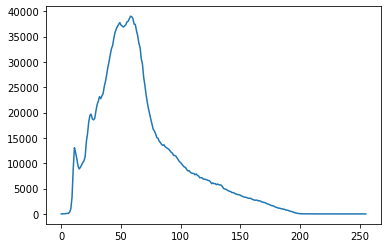

In [5]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) # 입력 그레이스케일 히스토그램 계산
plt.plot(hist)
hist

#### 1. 누적 히스토그램 계산

In [6]:
# 누적 히스토그램 계산
sum = 0
cumulative_histogram = []
for i in hist:
    sum += i[0]
    cumulative_histogram.append(sum)
cumulative_histogram

[0.0,
 6.0,
 50.0,
 96.0,
 180.0,
 281.0,
 405.0,
 742.0,
 1740.0,
 5050.0,
 13943.0,
 27024.0,
 39116.0,
 50054.0,
 59536.0,
 68412.0,
 77609.0,
 87266.0,
 97387.0,
 107856.0,
 119174.0,
 133427.0,
 149329.0,
 167504.0,
 186976.0,
 206659.0,
 225405.0,
 243967.0,
 262809.0,
 283094.0,
 304665.0,
 326900.0,
 350047.0,
 372796.0,
 396083.0,
 419804.0,
 444936.0,
 471098.0,
 498543.0,
 527497.0,
 557525.0,
 588913.0,
 621497.0,
 654737.0,
 689370.0,
 725187.0,
 761647.0,
 798651.0,
 836045.0,
 873812.0,
 911079.0,
 948191.0,
 985078.0,
 1022163.0,
 1059487.0,
 1097381.0,
 1135394.0,
 1173895.0,
 1212914.0,
 1251856.0,
 1290405.0,
 1327872.0,
 1365288.0,
 1401421.0,
 1436599.0,
 1470293.0,
 1503161.0,
 1533796.0,
 1563374.0,
 1590361.0,
 1615831.0,
 1639429.0,
 1661505.0,
 1682313.0,
 1702105.0,
 1720799.0,
 1738457.0,
 1755177.0,
 1771551.0,
 1787359.0,
 1802434.0,
 1817388.0,
 1831743.0,
 1845826.0,
 1859554.0,
 1873090.0,
 1886736.0,
 1900028.0,
 1913119.0,
 1926065.0,
 1938841.0,
 195

#### 2. 1에서 구한 누적 히스토그램을 이용하여 정규화

In [7]:
# 그레이 스케일의 정규화된 누적 히스토그램 계산
normalize_cumulative_histogram = []
img_size = gray.size
for i in cumulative_histogram:
    normalize_cumulative_histogram.append(i / img_size)
normalize_cumulative_histogram

[0.0,
 2.44140625e-06,
 2.0345052083333332e-05,
 3.90625e-05,
 7.32421875e-05,
 0.00011433919270833333,
 0.000164794921875,
 0.00030192057291666665,
 0.0007080078125,
 0.0020548502604166665,
 0.005673421223958333,
 0.01099609375,
 0.015916341145833332,
 0.020367024739583333,
 0.02422526041666667,
 0.0278369140625,
 0.03157918294270833,
 0.03550862630208333,
 0.03962687174479167,
 0.04388671875,
 0.048492024739583334,
 0.05429158528645833,
 0.060762125651041665,
 0.06815755208333334,
 0.07608072916666667,
 0.08408976236979167,
 0.091717529296875,
 0.09927042643229167,
 0.106937255859375,
 0.11519124348958333,
 0.123968505859375,
 0.13301595052083334,
 0.14243448893229166,
 0.15169108072916668,
 0.16116658528645833,
 0.17081868489583332,
 0.181044921875,
 0.19169026692708332,
 0.202857666015625,
 0.21463907877604166,
 0.22685750325520834,
 0.23962931315104166,
 0.25288777669270834,
 0.2664131673177083,
 0.28050537109375,
 0.295079345703125,
 0.30991495768229166,
 0.324971923828125,
 0.34

#### 3. 2에서 정규화 시킨 히스토그램을 평활화에 적용

In [8]:
# 히스토그램 평활화 적용
gray_layer, = cv2.split(gray)
img_new = [[0 for _ in range(gray_layer.shape[1])] for _ in range(gray_layer.shape[0])]
for y in range(gray_layer.shape[0]):
    for x in range(gray_layer.shape[1]):
        img_new[y][x] = round(normalize_cumulative_histogram[gray_layer[y][x]] * 255)

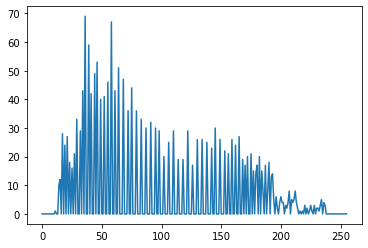

In [9]:
new_img = cv2.merge([np.asarray(img_new)])
new_img = new_img.astype('uint8')
hist2 = cv2.calcHist(new_img, [0], None, [256], [0, 256]) # 결과 그레이스케일 히스토그램 계산
plt.plot(hist2)

openCV는 **equalizeHist()** 라는 함수를 이용하여 히스토그램 평활화를 할 수 있다.

In [10]:
use_api = cv2.equalizeHist(gray)

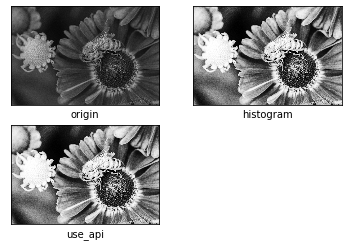

In [11]:
r = [gray, new_img, use_api]
label = ["origin", "histogram", "use_api"]
fig = plt.figure()
for i in range(len(r)):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(r[i], cmap='gray', interpolation='none', vmin=0, vmax=255)
    ax.set_xlabel(label[i])
    ax.set_xticks([]), ax.set_yticks([])

## 색상 범위 지정에 의한 영역 분할
색 정보가 따로 있는 HSV를 주로 이용한다. 특정 색 영역만 찾을때 사용한다.  
**inRange()** 함수를 통해 특정 색상을 추출할 수 있다.

### inRange(src(Input), lowerb, upperb, dst(Output))

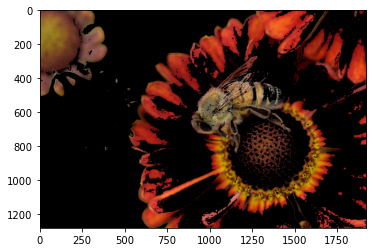

In [12]:
img_mask = cv2.inRange(hsv, (0, 0, 0), (25, 255, 255)) # h 0-12, s 0-255, v 0-255
img_result = cv2.bitwise_and(img, img, mask=img_mask) # 원본 이미지에 마스크로 적용
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)

#### 색상 범위 지정에 의한 영역 분할의 문제점
원색에 가까운 색만 추출이 가능하다.  

## 히스토그램 역투영
입력 영상에서 찾고자 하는 기준 영상(mask 영상)을 미리 가지고 있다면, 컬러 히스토그램 정보를 비슷한 색상 영역을 찾는 방법이다. 색상 범위지정을 이용힌 영역 분할의 단점을 보완한 방법이다. 임의의 색상 영역을 검출할 때 효과적이다.

### 검출 과정

#### 1. 검출할 영역 히스토그램 만들기
검출할 영역 일부를 미리 크롭한 사진을 이용해 검출에 사용할 히스토그램을 만든다.

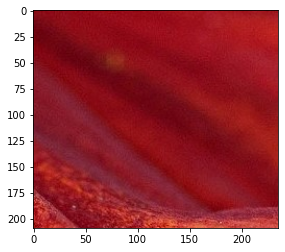

In [13]:
img_his = cv2.imread("./img/color_video_processing/flower_histogram.jpg")
img_his_ycbr = cv2.cvtColor(img_his, cv2.COLOR_BGR2YCrCb)
hist = cv2.calcHist([img_his_ycbr], [1, 2], None, [128, 128], [0, 256, 0, 256])
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # 큰 값에 몰리지 않도록 하기 위해 log스케일을 해줌
img_his_s = cv2.cvtColor(img_his, cv2.COLOR_BGR2RGB)
plt.imshow(img_his_s)

#### 2. 입력 영상 전체에 히스토그램 역투영
openCV에서 지원하는 **calcBackProject()** 함수를 이용해서 히스토그램을 역투영 한다.

#### calcBackProject(images, channels, histogram, ranges, scale)

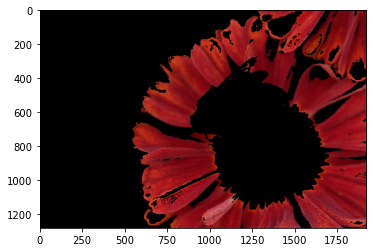

In [14]:
backproj = cv2.calcBackProject([ycrcb], [1, 2], hist, [0, 256, 0, 256], 1)
img_result = cv2.copyTo(img, backproj)
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)